In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

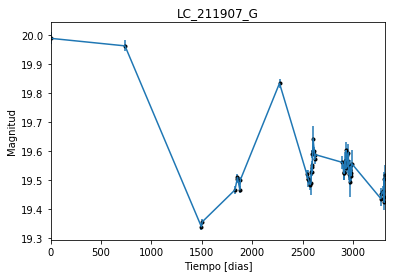

In [3]:
data = np.genfromtxt('LC_211907_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_211907_G')
plt.savefig("LC_211907_G.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

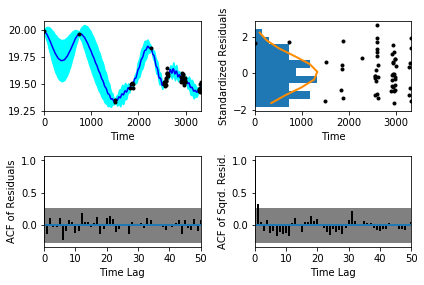

In [6]:
sample.assess_fit()

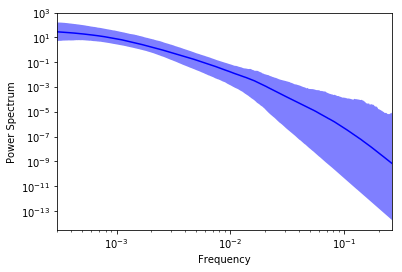

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

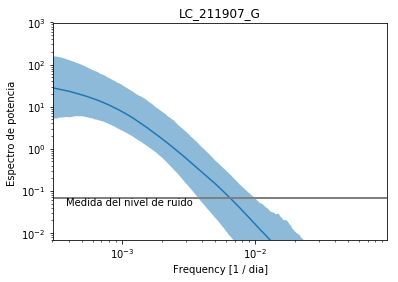

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_211907_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_211907_G')

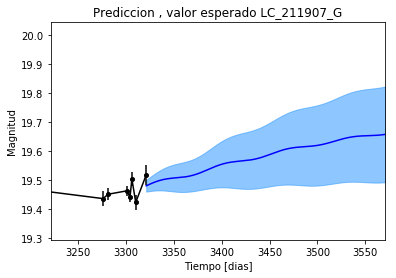

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_211907_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_211907_G')

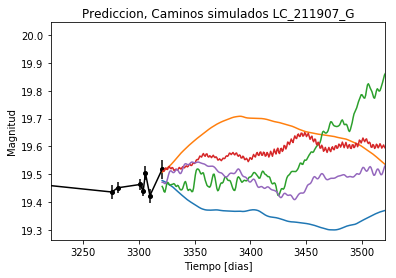

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_211907_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


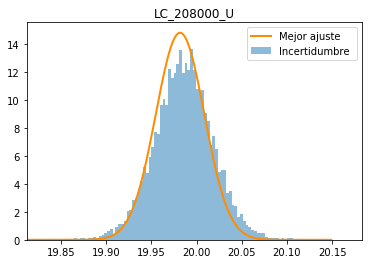

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_208000_U')
plt.savefig("Mejor_ajuste_LC_211907_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_211907_G')

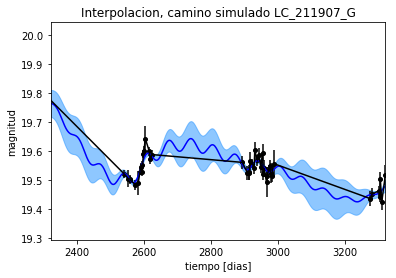

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_G')

Text(0.5,1,'Interpolacion, camino simulado LC_211907_G')

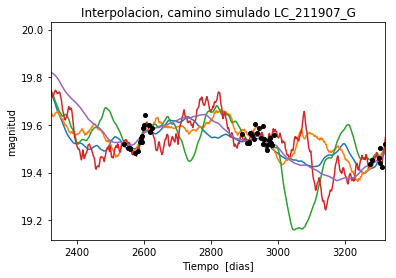

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 8689.46245824
Median: 0.00941136668163
Standard deviation: 0.109691239291
68% credibility interval: [ 0.00088221  0.13888403]
95% credibility interval: [  3.58622030e-04   4.23119694e-01]
99% credibility interval: [  3.09447711e-04   5.00540558e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 314.693832877
Median: 0.00205394418043
Standard deviation: 0.0512681759384
68% credibility interval: [ 0.0004664   0.02148606]
95% credibility interval: [ 0.00031875  0.16660218]
99% credibility interval: [  3.04348320e-04   4.01824347e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 230.378875217
Median: 0.00723287471502
Standar

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 750.666403008
Median: 116.056144307
Standard deviation: 1.93196092464
68% credibility interval: [ 113.97061424  117.65552497]
95% credibility interval: [ 111.26597315  118.74851087]
99% credibility interval: [ 109.3029232   119.69698779]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 498.955902919
Median: 0.287050639008
Standard deviation: 1.1483154367
68% credibility interval: [ 0.0367229  1.9547313]
95% credibility interval: [ 0.01381985  3.77858895]
99% credibility interval: [ 0.01026743  5.50596655]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 285.816468588
Median: 0.278674855192
Standard deviation: 2.50874184735
68% credibility interval: [ 0.01299266  2.53761931]
95% credibility interval: [  3.18003691e-03  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 15487.5740459
Median: 4.57403433442e-37
Standard deviation: 8.55299414349e+121
68% credibility interval: [  6.69720733e-110   3.40225324e-004]
95% credibility interval: [  6.19552781e-133   7.08683911e+060]
99% credibility interval: [  3.32962968e-140   3.25372729e+079]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1513.07065084
Median: 19.6612453503
Standard deviation: 0.126281688922
68% credibility interval: [ 19.55808802  19.77656117]
95% credibility interval: [ 19.42886459  19.93920682]
99% credibility interval: [ 19.31539558  20.08904253]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 364.431758481
Median: 0.017450686981
Standard deviation: 0.126385010084
68% credibility interval: [ 0.          0.20146445]
95% credibility interval: [ 0.          0.45254487]
99% credibility interval: [ 0.          0.50723927]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 364.431758481
Median: 0.017450686981
Standard deviation: 0.126385010084
68% credibility interval: [ 0.          0.20146445]
95% credibility interval: [ 0.          0.45254487]
99% credibility interval: [ 0.          0.50723927]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1239.7823857
Median: 0.0
Standard deviation: 0.000376762961793
68% credi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 750.666403008
Median: 116.056144307
Standard deviation: 1.93196092464
68% credibility interval: [ 113.97061424  117.65552497]
95% credibility interval: [ 111.26597315  118.74851087]
99% credibility interval: [ 109.3029232   119.69698779]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1098.52244522
Median: 0.0577577729822
Standard deviation: 0.0675100899746
68% credibility interval: [ 0.03573771  0.10926442]
95% credibility interval: [ 0.02380571  0.24780264]
99% credibility interval: [ 0.01992318  0.46188845]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1344.46112614
Median: 1.10260109872
Standard deviation: 0.193124183751
68% credibility interval: [ 0.94596523  1.31923143]
95% credibility interval: [ 0.81054063  1.56068582]
99% credibility interval: [ 0.73554179  1.74163677]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 212.436654961
Median: 0.000139513783677
Standard deviation: 0.0138501179868
68% credibility interval: [  2.38612807e-06   1.57932156e-03]
95% credibility interval: [  1.03517685e-64   1.07100913e-02]
99% credibility interval: [  1.03414044e-83   1.25075767e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 8689.46245824
Median: (-0.0591333608545+0j)
Standard deviation: 1.05147822534
68% credibility interval: [-0.87263410+0.j         -0.00554306-0.04992369j]
95% credibility interval: [ -2.65853944e+00+0.j          -2.25328867e-03-3.15124088j]
99% credibility interval: [ -3.14498908e+00+0.j          -1.94431731e-03-0.00055251j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 314.693832877
Median: (-0.0129053118963+0j)
Standard deviation: 0.856949006757
68% credibility interval: [-0.13500090+1.87477118j -0.00293051+0.1601378j ]
95% credibility interval: [-1.04679237+0.j -0.00200273+0.j]
99% credibility interval: [ -2.52473683e+00+1.80940014j  -1.91227689e-03+0.00546027j]
Posterior summary for parameter ar_roots  element 2
-